In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_set.xls to data_set.xls


#IMPORTING LIBRARIES

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_excel('data_set.xls')
#used to read csv files and perform operations on it

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


#HANDLING CATEGORICAL DATA

In [28]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

df = df.dropna(how='all',axis=1)

[[ 10.  25.   7. ...  90. 172.  30.]
 [ 35.   0.   7. ...  98. 178.  31.]
 [  2.  22.   7. ...  89. 170.  31.]
 ...
 [  3.   0.   0. ...  98. 170.  34.]
 [  7.   0.   0. ... 100. 170.  35.]
 [ 34.   0.   0. ...  77. 175.  25.]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [29]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [31]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.22857143 0.64285714 0.66666667 ... 0.17307692 0.27272727 0.15789474]
 [0.62857143 0.75       0.5        ... 0.17307692 0.33333333 0.10526316]
 [0.05714286 0.92857143 0.16666667 ... 0.63461538 0.21212121 0.63157895]
 ...
 [0.45714286 0.85714286 0.08333333 ... 0.13461538 0.21212121 0.15789474]
 [0.17142857 0.         0.91666667 ... 0.23076923 0.15151515 0.26315789]
 [0.34285714 0.35714286 0.83333333 ... 0.26923077 0.18181818 0.31578947]]
[[0.48571429 0.89285714 0.33333333 ... 0.53846154 0.57575758 0.31578947]
 [0.         0.03571429 0.41666667 ... 0.61538462 0.27272727 0.52631579]
 [0.77142857 0.42857143 1.         ... 0.25       0.18181818 0.26315789]
 ...
 [0.62857143 0.         0.91666667 ... 0.17307692 0.33333333 0.10526316]
 [0.65714286 0.35714286 0.5        ... 0.21153846 0.21212121 0.21052632]
 [0.05714286 0.92857143 0.16666667 ... 0.63461538 0.21212121 0.63157895]]


#GRAPHS

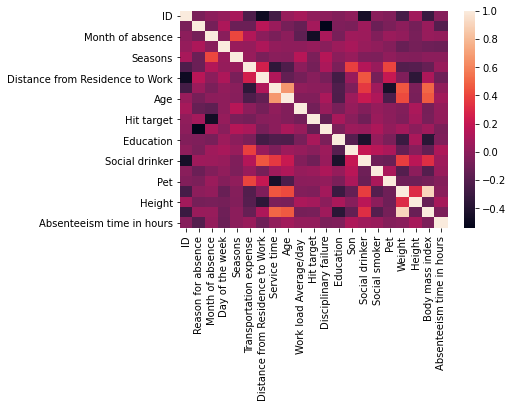

In [32]:
sns.heatmap(df.corr())

#ALGORITHM

In [33]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#FITTING OF TRAINING DATA

In [34]:
knn.fit(x_train,y_train)
#training or fitting the train data into the model

ValueError: ignored

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [ ]:
predictions = knn.predict(x_test)

In [ ]:
plt.scatter(y_test,predictions)

#EVALUATION

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
print(metrics.accuracy_score(y_test, predictions))

#SAVING THE MODEL USING PICKLE LIBRARY

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
predictions=predictions[0:160]
results =confusion_matrix(y_train, predictions)
print(results)

Precision, Recall, Support, Fscore

In [ ]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_test=y_test[0:160]
results =confusion_matrix(y_test, predictions)
print(results)

Precision, Recall, Support, Fscore

In [ ]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')